# **Practical 1**

## **ANN Implementation with Tensorflow and Keras**


**Importing Libraries**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
tf.__version__

'2.15.0'

**Loading the Mnist Dataset**

In [ ]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


**Checking Dimensions and shape**

In [ ]:
print(type(X_train))
print(X_train.shape)


<class 'numpy.ndarray'>
(60000, 28, 28)


In [ ]:
type(X_train[0][0])

numpy.ndarray

In [ ]:
X_train.ndim

3

In [ ]:
print(type(X_test))
print(X_test.shape)

<class 'numpy.ndarray'>
(10000, 28, 28)


In [ ]:
print(type(y_train))
print(y_train.shape)

<class 'numpy.ndarray'>
(60000,)


In [ ]:
print(type(y_test))
print(y_test.shape)

<class 'numpy.ndarray'>
(10000,)


In [ ]:
X_train[6]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 145,
        255, 211,  31,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 237,
        253, 252,  71,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 175,
        253, 252,  71,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 144,
        253, 252,  71,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  16, 191,
        253, 252,  71,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  26, 221,
        253, 252, 124,  31,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 125,
        253, 252, 252, 108,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        253, 252, 252, 108,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        255, 253, 253, 108,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        253, 252, 252, 108,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        253, 252, 252, 108,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        253, 252, 252, 108,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        255, 253, 253, 170,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        253, 252, 252, 252,  42,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        149, 252, 252, 252, 144,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        109, 252, 252, 252, 144,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 218, 253, 253, 255,  35,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 175, 252, 252, 253,  35,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  73, 252, 252, 253,  35,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  31, 211, 252, 253,  35,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

**Data Visualization**

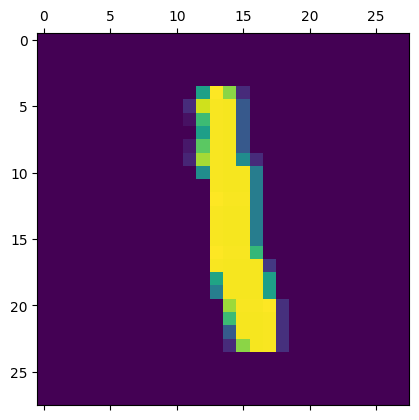

In [ ]:
plt.matshow(X_train[6])


**Reshaping the Dataset**

In [ ]:
X_train_flat=X_train.reshape(len(X_train),28*28)

**Creating ANN Model**

In [ ]:
model=keras.Sequential([
                        keras.layers.Dense(100,input_shape=(28*28,),activation="sigmoid"),
                        keras.layers.Dense(50,activation="relu"),
                        keras.layers.Dense(10,activation="sigmoid"),
                        ])
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(X_train_flat,y_train,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5436 - accuracy: 0.8389
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3795 - accuracy: 0.8845
Epoch 3/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3469 - accuracy: 0.8925
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3262 - accuracy: 0.9000
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2930 - accuracy: 0.9084
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2830 - accuracy: 0.9118
Epoch 7/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2664 - accuracy: 0.9178
Epoch 8/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2516 - accuracy: 0.9223
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2486 - accuracy: 0.9228
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.246

In [ ]:
model2=keras.Sequential([
                        keras.layers.Flatten(),
                        keras.layers.Dense(100,input_shape=(28*28,),activation="sigmoid"),
                        keras.layers.Dense(50,activation="relu"),
                        keras.layers.Dense(10,activation="sigmoid"),
                        ])
model2.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model2.fit(X_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5500 - accuracy: 0.8350
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3818 - accuracy: 0.8839
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3341 - accuracy: 0.8974
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3263 - accuracy: 0.8982
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3052 - accuracy: 0.9060


**Evaluating the model on test data**

In [ ]:
model2.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2885 - accuracy: 0.9110


[0.288458913564682, 0.9110000133514404]

In [ ]:
y_test_pre=model2.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [ ]:
y_test_pre.shape

(10000, 10)

In [ ]:
np.argmax(y_test_pre[555])

4

In [ ]:
np.argmax(y_test_pre[899])

8

In [ ]:
y_test_label=[np.argmax(i) for i in y_test_pre]
y_test_label=np.array(y_test_label)

In [ ]:
y_test_label.shape

(10000,)

In [ ]:
y_test[7],y_test_pre[7],np.argmax(y_test_pre[7]),y_test_label[7]

(9,
 array([1.0058415e-04, 9.3672544e-02, 6.3384973e-02, 6.1811197e-01,
        6.1551034e-02, 9.2473038e-02, 3.7356655e-04, 7.7846810e-02,
        7.2475493e-01, 9.0895939e-01], dtype=float32),
 9,
 9)

In [ ]:
y_test[23],y_test_pre[23],np.argmax(y_test_pre[23]),y_test_label[23]

(5,
 array([0.07107931, 0.01382751, 0.00353759, 0.13587125, 0.13045487,
        0.9977077 , 0.6501308 , 0.00151436, 0.781938  , 0.17540963],
       dtype=float32),
 5,
 5)

**Creating confusion matrix**

In [ ]:
cm=tf.math.confusion_matrix(y_test,y_test_label)
type(cm)

tensorflow.python.framework.ops.EagerTensor

<Axes: >

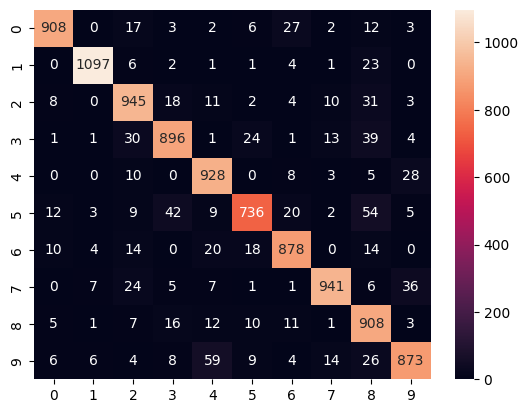

In [ ]:
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
model3=keras.Sequential([
                        keras.layers.Flatten(),
                        keras.layers.Dense(100,input_shape=(28*28,),activation="softmax"),
                        keras.layers.Dense(50,activation="relu"),
                        keras.layers.Dense(10,activation="softmax"),
                        ])
model3.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model3.fit(X_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2982 - accuracy: 0.5706
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0645 - accuracy: 0.6190
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9539 - accuracy: 0.6605
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9170 - accuracy: 0.6769
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9115 - accuracy: 0.6690


In [ ]:
model3.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.8295 - accuracy: 0.6938


[0.8294774293899536, 0.6937999725341797]

In [ ]:
y_test_pre=model3.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [ ]:
y_test_label=[np.argmax(i) for i in y_test_pre]
y_test_label=np.array(y_test_label)

In [ ]:
y_test[7],y_test_pre[7],np.argmax(y_test_pre[7]),y_test_label[7]

(9,
 array([0.00206884, 0.00100833, 0.01449769, 0.00691754, 0.49536073,
        0.00758147, 0.00901219, 0.04644367, 0.01905956, 0.39805004],
       dtype=float32),
 4,
 4)

In [ ]:
np.sum(y_test_pre[9])

1.0